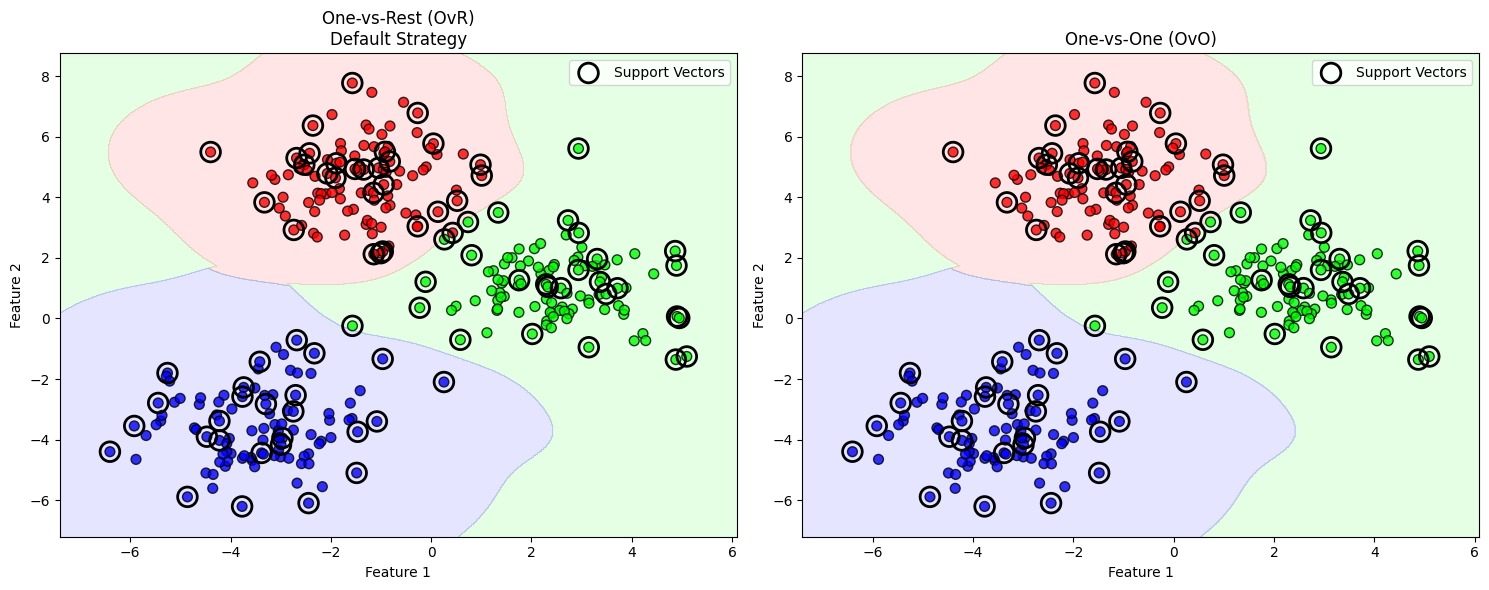

MULTICLASS SVM COMPARISON

1. ONE-VS-REST (OvR) Strategy:
------------------------------------------------------------
   Number of classes: 3
   Number of binary classifiers: 3
   Total support vectors: 83
   Support vectors per class: [29 28 26]
   Training accuracy: 0.997

   How it works:
   - Classifier 1: Class 0 vs (Class 1 + Class 2)
   - Classifier 2: Class 1 vs (Class 0 + Class 2)
   - Classifier 3: Class 2 vs (Class 0 + Class 1)
   - Prediction: Class with highest decision score

2. ONE-VS-ONE (OvO) Strategy:
------------------------------------------------------------
   Number of classes: 3
   Number of binary classifiers: 3
   Total support vectors: 83
   Support vectors per class: [29 28 26]
   Training accuracy: 0.997

   How it works:
   - Classifier 1: Class 0 vs Class 1
   - Classifier 2: Class 0 vs Class 2
   - Classifier 3: Class 1 vs Class 2
   - Prediction: Voting - class that wins most comparisons

COMPARISON

One-vs-Rest (OvR):
  ✓ Fewer classifiers (N)
  ✓ Fas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

# Generate 3-class dataset
X, y = make_blobs(n_samples=300, centers=3, random_state=42, 
                  cluster_std=1.2, center_box=(-5, 5))

# Train multiclass SVM models
model_ovr = SVC(kernel='rbf', C=1, decision_function_shape='ovr', gamma='auto')
model_ovo = SVC(kernel='rbf', C=1, decision_function_shape='ovo', gamma='auto')

model_ovr.fit(X, y)
model_ovo.fit(X, y)

def plot_multiclass_decision_boundary(model, X, y, ax, title):
    """Plot decision boundary for multiclass SVM"""
    # Create mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, 
               edgecolors='k', s=50, alpha=0.8)
    
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], 
               model.support_vectors_[:, 1],
               s=200, linewidth=2, facecolors='none',
               edgecolors='black', label='Support Vectors')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_multiclass_decision_boundary(model_ovr, X, y, axes[0], 
                                  'One-vs-Rest (OvR)\nDefault Strategy')
plot_multiclass_decision_boundary(model_ovo, X, y, axes[1], 
                                  'One-vs-One (OvO)')

plt.tight_layout()
plt.show()

# Print detailed information
print("=" * 60)
print("MULTICLASS SVM COMPARISON")
print("=" * 60)

print("\n1. ONE-VS-REST (OvR) Strategy:")
print("-" * 60)
print(f"   Number of classes: {len(np.unique(y))}")
print(f"   Number of binary classifiers: {len(np.unique(y))}")
print(f"   Total support vectors: {len(model_ovr.support_vectors_)}")
print(f"   Support vectors per class: {model_ovr.n_support_}")
print(f"   Training accuracy: {model_ovr.score(X, y):.3f}")

print("\n   How it works:")
print("   - Classifier 1: Class 0 vs (Class 1 + Class 2)")
print("   - Classifier 2: Class 1 vs (Class 0 + Class 2)")
print("   - Classifier 3: Class 2 vs (Class 0 + Class 1)")
print("   - Prediction: Class with highest decision score")

print("\n2. ONE-VS-ONE (OvO) Strategy:")
print("-" * 60)
n_classes = len(np.unique(y))
n_classifiers = n_classes * (n_classes - 1) // 2
print(f"   Number of classes: {n_classes}")
print(f"   Number of binary classifiers: {n_classifiers}")
print(f"   Total support vectors: {len(model_ovo.support_vectors_)}")
print(f"   Support vectors per class: {model_ovo.n_support_}")
print(f"   Training accuracy: {model_ovo.score(X, y):.3f}")

print("\n   How it works:")
print("   - Classifier 1: Class 0 vs Class 1")
print("   - Classifier 2: Class 0 vs Class 2")
print("   - Classifier 3: Class 1 vs Class 2")
print("   - Prediction: Voting - class that wins most comparisons")

print("\n" + "=" * 60)
print("COMPARISON")
print("=" * 60)
print("\nOne-vs-Rest (OvR):")
print("  ✓ Fewer classifiers (N)")
print("  ✓ Faster training and prediction")
print("  ✗ Imbalanced training sets (1 class vs all others)")

print("\nOne-vs-One (OvO):")
print("  ✓ Balanced training sets (only 2 classes each)")
print("  ✓ Can be more accurate")
print("  ✗ More classifiers (N×(N-1)/2)")
print("  ✗ Slower for many classes")

# Demonstrate decision function output
print("\n" + "=" * 60)
print("DECISION FUNCTION EXAMPLE")
print("=" * 60)
sample_point = X[0:1]
print(f"\nSample point: {sample_point[0]}")
print(f"True class: {y[0]}")
print(f"\nOvR decision scores: {model_ovr.decision_function(sample_point)[0]}")
print(f"Predicted class: {model_ovr.predict(sample_point)[0]}")
print(f"\nOvO decision scores: {model_ovo.decision_function(sample_point)[0]}")
print(f"Predicted class: {model_ovo.predict(sample_point)[0]}")

In [2]:
#Predict the model classification metrices like accuracy_score, confusion_matrix, classification_report etc.
from sklearn.metrics import accuracy_score, confusion_matrix
y_ovr_pred = model_ovr.predict(X)
y_ovo_pred = model_ovo.predict(X)
print("\nOvR Classification Report:")
print(f"Accuracy: {accuracy_score(y, y_ovr_pred):.3f}")
print("OvR Confusion Matrix:")
print(confusion_matrix(y, y_ovr_pred))
print(f"\nAccuracy: {accuracy_score(y, y_ovo_pred):.3f}")
print("OvO Confusion Matrix:")
print(confusion_matrix(y, y_ovo_pred))


OvR Classification Report:
Accuracy: 0.997
OvR Confusion Matrix:
[[ 99   1   0]
 [  0 100   0]
 [  0   0 100]]

Accuracy: 0.997
OvO Confusion Matrix:
[[ 99   1   0]
 [  0 100   0]
 [  0   0 100]]
